In [1]:
import os
import errno
import numpy as np 
import deepcell

In [2]:
# create folder for this set of experiments
experiment_folder = "20200619_production_updates"
MODEL_DIR = os.path.join("/data/models", experiment_folder)
NPZ_DIR = "/data/npz_data/"
LOG_DIR = '/data/logs'

if not os.path.isdir(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [3]:
from deepcell.utils.data_utils import get_data
from skimage.segmentation import relabel_sequential

npz_name = "20200730_all_data_512x512"

test_size=0.1
seed=0
DATA_FILE = NPZ_DIR + npz_name + ".npz"
train_dict, val_dict = get_data(DATA_FILE, test_size=test_size, seed=seed)
X_train, y_train = train_dict['X'], train_dict['y']
X_val, y_val = val_dict['X'], val_dict['y']

X.shape: (864, 512, 512, 2)
y.shape: (864, 512, 512, 1)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


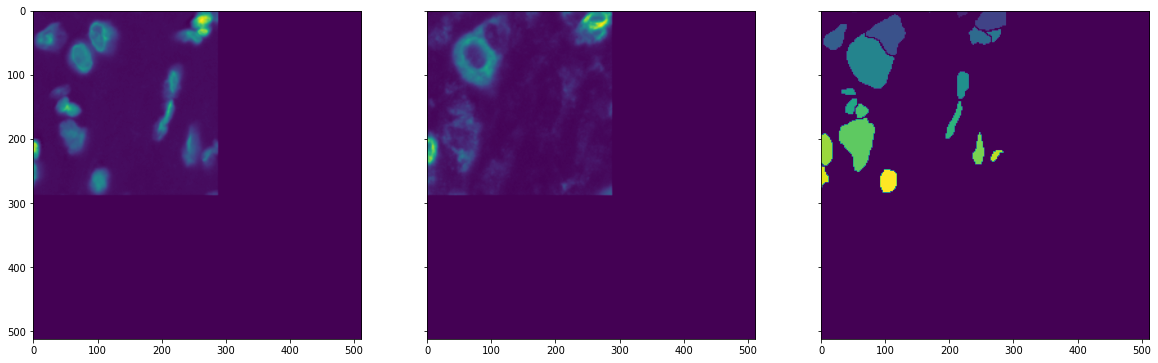

In [4]:
for i in range(y_train.shape[0]):
        y_train[i], _, _ = relabel_sequential(y_train[i])
        
for i in range(y_val.shape[0]):
        y_val[i], _, _ = relabel_sequential(y_val[i])
        
               
print('X.shape: {}\ny.shape: {}'.format(X_train.shape, y_train.shape))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 20), sharex=True, sharey=True)

idx = 107
axes[0].imshow(X_train[idx,:,:,0].astype('float32'))
axes[1].imshow(X_train[idx,:,:,1].astype('float32'))
axes[2].imshow(y_train[idx,:,:,0].astype('float32'))
print(np.unique(y_train[idx]))

In [6]:
from deepcell.applications import MultiplexSegmentation
app = MultiplexSegmentation()
app_output = app.predict(image=X_val[:10])

324329472/324321424 [==============================] - 3s 0us/step


In [7]:
from deepcell_toolbox.metrics import Metrics
m = Metrics('human vs human', seg=False)
m.calc_object_stats(y_true=y_val[:10, :, :, 0], y_pred=app_output[:, :, :, 0])
recall = m.stats['correct_detections'].sum() / m.stats['n_true'].sum()
precision = m.stats['correct_detections'].sum() / m.stats['n_pred'].sum()
f1 = 2 * precision * recall / (precision + recall)
print(f1)


____________Object-based statistics____________

Number of true cells:		 3618
Number of predicted cells:	 2834

Correct detections:  1906	Recall: 52.68103924820342598422939772717654705047607421875%
Incorrect detections: 928	Precision: 67.2547635850388161316004698164761066436767578125%

Gained detections: 300	Perc Error: 23.734177215189873777489992789924144744873046875%
Missed detections: 460	Perc Error: 36.392405063291136002590064890682697296142578125%
Merges: 397		Perc Error: 31.408227848101265777813750901259481906890869140625%
Splits: 50		Perc Error: 3.955696202531645777611402081674896180629730224609375%
Catastrophes: 57		Perc Error: 4.50949367088607555587032038602046668529510498046875%

Gained detections from splits: 55
Missed detections from merges: 615
True detections involved in catastrophes: 26
Predicted detections involved in catastrophes: 19 

Average Pixel IOU (Jaccard Index): 0.82338717453549625790998334196046926081180572509765625 

0.5908245505269685
